In [10]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
import re
import matplotlib.pyplot as plt

In [3]:
col_names = np.genfromtxt('clean2.names', delimiter = ':', dtype=str)[:,0]

In [4]:
musk_df = pd.read_csv('clean2.data', names = col_names)

In [5]:
musk_df

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1.0
MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1.0
MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1.0
MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1.0
MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,...,-66,164,-14,-29,107,171,-44,-115,118,0.0
NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,...,-51,166,-9,150,129,158,-66,-144,-5,0.0
NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,...,90,117,-8,150,130,159,-66,-144,-6,0.0
NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,...,86,99,-14,-31,106,171,-44,-116,117,0.0


In [7]:
features_df = musk_df.iloc[:,2:-1]

In [9]:
features_df.corr()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165
f1,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,0.270608,0.052151,...,0.169423,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361
f2,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,0.429700,0.154603,...,0.291073,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434
f3,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,-0.559255,0.426113,...,-0.239451,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985
f4,-0.134689,-0.080964,-0.044896,1.000000,0.024860,0.045389,-0.162539,0.064376,0.005144,-0.161626,...,-0.043933,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,-0.046188,-0.090038,-0.081910
f5,0.125947,0.210432,-0.222191,0.024860,1.000000,-0.238260,0.002716,-0.230350,0.164480,-0.144934,...,0.211452,0.179304,0.551549,0.056876,0.043218,0.062755,0.046881,0.024317,0.002557,-0.050493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f161,-0.118212,-0.206860,-0.241346,0.103419,0.062755,0.120020,-0.353299,0.145991,0.115375,-0.385462,...,-0.078664,0.006801,0.091154,0.286800,0.440238,1.000000,-0.430409,-0.084307,0.352140,0.071019
f162,-0.028524,-0.131828,0.182826,0.027131,0.046881,0.131520,-0.090044,0.127985,-0.115943,-0.055471,...,-0.073171,-0.067344,-0.109691,-0.345939,-0.265327,-0.430409,1.000000,0.463805,-0.259628,-0.321964
f163,-0.069193,-0.111005,-0.189530,-0.046188,0.024317,0.049882,-0.266026,0.058630,0.131188,-0.306691,...,-0.061690,0.010607,0.081277,-0.237208,-0.249093,-0.084307,0.463805,1.000000,0.484594,-0.137858
f164,-0.133091,-0.086150,-0.364233,-0.090038,0.002557,0.000166,-0.298356,0.016455,0.238632,-0.374528,...,-0.026615,0.056730,0.177570,-0.105115,-0.193039,0.352140,-0.259628,0.484594,1.000000,0.161670


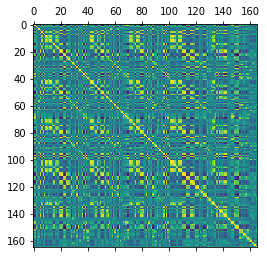

In [11]:
plt.matshow(features_df.corr())
plt.show()

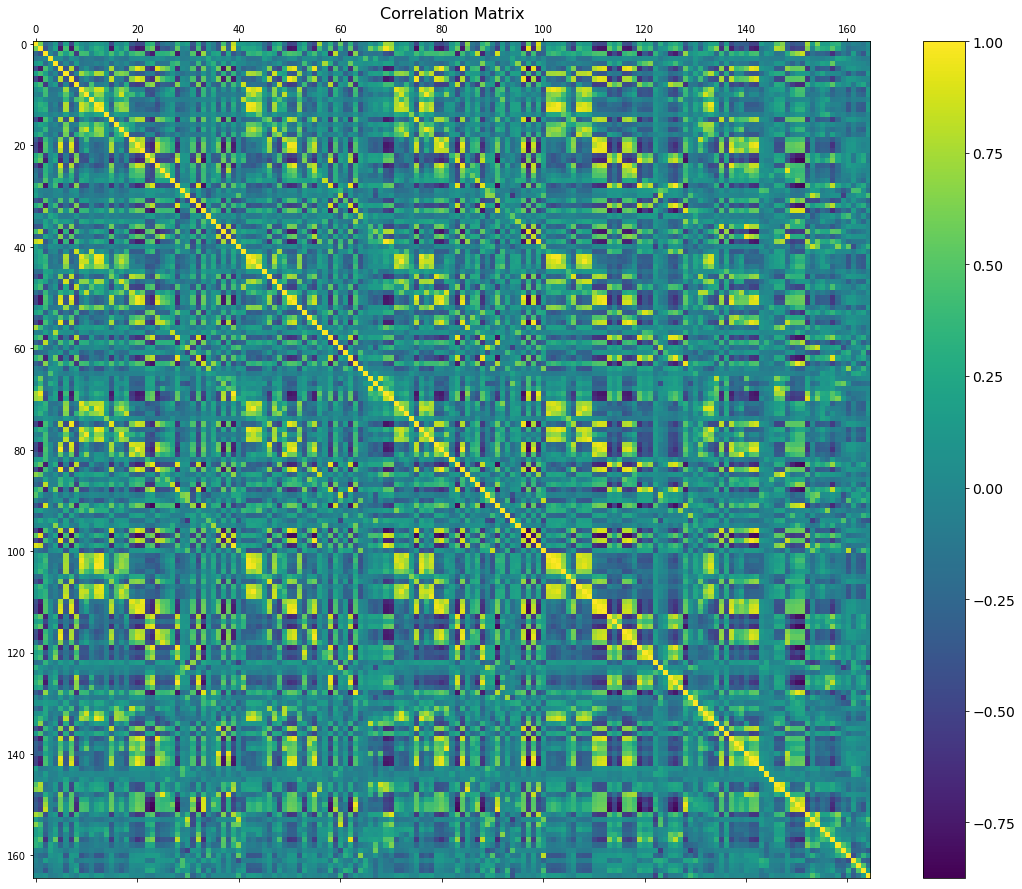

In [19]:
f = plt.figure(figsize=(19, 15))
plt.matshow(features_df.corr(), fignum=f.number)
# plt.xticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5, rotation=45)
# plt.yticks(range(features_df.select_dtypes(['number']).shape[1]), features_df.select_dtypes(['number']).columns, fontsize=5)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
